<a href="https://colab.research.google.com/github/Loris997/Learning_portfolio/blob/main/Learning_portfolio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I used a dataset with handwritten letters. The dataset was availabel on kaggle.


First I had to import all necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from google.colab import drive
from google.colab import data_table
data_table.enable_dataframe_formatter()


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,classification_report
from sklearn.ensemble import RandomForestClassifier




Loaded the data.

In [ ]:

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/SE/A_Z Handwritten Data.csv")

Mounted at /content/drive


Had a look at the data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [ ]:
data.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [ ]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


A visualization of possible letters.

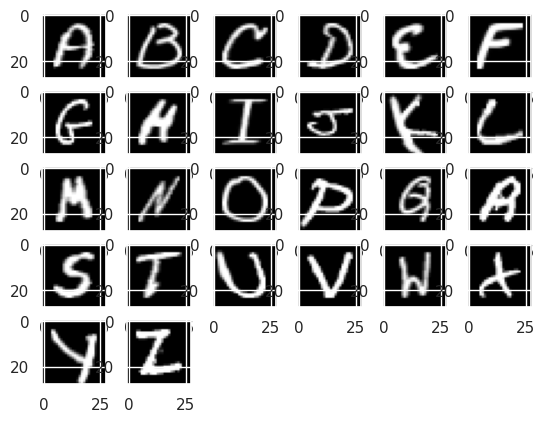

In [ ]:
for i in range(26):
    dd = data[data['0']==i].iloc[1]
    x = dd[1:].values
    x = x.reshape((28, 28))
    im = plt.subplot(5, 6, i+1)
    im.imshow(x, cmap='gray')

Split the train and test data.

In [ ]:
X = data.drop('0',axis=1)
y = data['0']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train.value_counts()

14    46196
18    38863
20    23148
2     18667
19    18048
15    15473
13    15254
0     11063
12     9849
17     9270
11     9267
4      9226
24     8657
22     8586
3      8090
1      6995
9      6825
7      5752
23     5003
25     4851
16     4653
6      4579
10     4471
21     3359
5       932
8       883
Name: 0, dtype: int64

I tried to use a random forest classifier model with 150 estimators.

Then I traind the model with the X_train data and Y_train labels.

I made prediction and assigned them to ypred.

At the end I printed the accuracy: 98.79 seems to be pretty solid.

In [ ]:
RFC = RandomForestClassifier(n_estimators=150)

RFC.fit(X_train,y_train)

ypred = RFC.predict(X_test)

print(RFC,":",accuracy_score(y_test,ypred)*100)

RandomForestClassifier(n_estimators=150) : 98.79312659417371
